### <a href="#End">[Go To End]</a>
###### .

# <a href="https://www.amazon.in/Fire-TV-Stick-Alexa-Voice-Remote-3rd-Gen/dp/B08R6QR863/"> <span style='background :orange' > Amazon Fire TV Stick <span/> </a>

# <span style='background :yellow' > Dependencies <span/>

In [1]:
# for preprocessing
from textblob import TextBlob
from string import punctuation
from bs4 import BeautifulSoup

# Text Preprocessing Modules
import re
import sys
import requests
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

# Data Analysis and wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.vis_utils import plot_model

#other librariess
import warnings
warnings.filterwarnings('ignore')
import csv

# for word cloud
from wordcloud import WordCloud

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV


# Machine Learinig Libraries
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from scipy.sparse import hstack

#keras Libraries 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Performance Measure
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Test Featurization Modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### `importing data thata we have Scraped from E-commerce website like Amazon `

In [2]:
df=pd.read_csv("C:/Users/lenovo/Downloads/Firestick (3).csv")
df

,Reviews
0,Everything is great but i bought it for 3999/-...
1,I am useing Sony bx32 modal tv(2012) it have 2...
2,Product works well upto 1year... Then u need t...
3,There is no customer support or details availa...
4,In the product description it says 'Made in In...
...,...
4038,"Best in this catagory, very good product and e..."
4039,Very good product. Features are amazing. And c...
4040,The Amazon fire TV stick is amazing.
4041,Great!


## `Summary of dataset`

In [3]:
df.rename(columns={'Review':'Reviews'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  4042 non-null   object
dtypes: object(1)
memory usage: 31.7+ KB


## `Dropping Duplicates & lenth of dataset`

In [4]:
#convering into string
df['Reviews'] = df['Reviews'].astype(str)
#drop duplicates 
df = df.drop_duplicates()
#length of data after dropping duplicates
print("Shape of dataframe after dropping duplicates:",df.shape)

Shape of dataframe after dropping duplicates: (3689, 1)


## <span style='background :yellow' > Text Preprocessing  </span> 

In [5]:
import nltk
nltk.download('punkt')
  #Remove Urls and HTML links
def remove_urls(Reviews):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', Reviews)
df['Reviews']=df['Reviews'].apply(lambda x:remove_urls(x))
def remove_html(Reviews):
    html=re.compile(r'<.*?>')
    return html.sub(r'',Reviews)
df['Reviews']=df['Reviews'].apply(lambda x:remove_html(x))
#_______________________________________________________________

# Lower casing
def lower(Reviews):
    low_text= Reviews.lower()
    return low_text
df['Reviews']=df['Reviews'].apply(lambda x:lower(x))
#_______________________________________________________________

# Number removal
def remove_num(Reviews):
    remove= re.sub(r'\d+', '', Reviews)
    return remove
df['Reviews']=df['Reviews'].apply(lambda x:remove_num(x))
#_______________________________________________________________
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def punct_remove(Reviews):
    punct = re.sub(r"[^\w\s\d]","", Reviews)
    return punct
df['Reviews']=df['Reviews'].apply(lambda x:punct_remove(x))
def remove_stopwords(Reviews):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(Reviews).split() if word not in STOPWORDS])
df['Reviews']=df['Reviews'].apply(lambda x:remove_stopwords(x))
#_______________________________________________________________

#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['Reviews']=df['Reviews'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['Reviews']=df['Reviews'].apply(lambda x:remove_hash(x))
#_______________________________________________________________
#Remove extra white space left while removing stuff
def remove_space(Reviews):
    space_remove = re.sub(r"\s+"," ",Reviews).strip()
    return space_remove
df['Reviews']=df['Reviews'].apply(lambda x:remove_space(x))
#_______________________________________________________________
df['Reviews'] = df['Reviews'].str.replace('The media could not be loaded.','')
#_______________________________________________________________
def clean_text(Reviews):
   
    Reviews = str(Reviews).lower() # convert to lowercase
    Reviews = re.sub('\[.*?\]', '', Reviews) 
    Reviews = re.sub('https?://\S+|www\.\S+', '', Reviews) # Remove URls
    Reviews = re.sub('<.*?>+', '', Reviews)
    Reviews = re.sub(r'[^a-z0-9\s]', '', Reviews) # Remove punctuation
    Reviews = re.sub('\n', '', Reviews)
    Reviews = re.sub('ok', '', Reviews)
    Reviews = re.sub('\w*\d\w*', '', Reviews)
    return Reviews
df['Reviews'] = df['Reviews'].apply(clean_text)
tokens = df['Reviews'].apply(word_tokenize)
df['Reviews'].replace('', np.nan, inplace=True)
df=df.dropna(subset=['Reviews'])
df = df.set_index('Reviews')
df.reset_index(inplace=True)
df['Reviews'] = df['Reviews'].astype(str)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviews
0,everything great bought days price hurts alot ...
1,useing sony bx modal tv hdmi port fire tv stic...
2,product works well upto year u need buy new on...
3,customer support details available tvs compati...
4,product description says made india package bo...
...,...
3667,best catagory good product easy install best t...
3668,good product features amazing carry one remote...
3669,amazon fire tv stick amazing
3670,great


In [6]:
size=df.Reviews.values
print("Size of Reviews:",size.shape)
len_=[len(word) for word in size]
print("Mean length of Reviews:",np.mean(len_))

Size of Reviews: (3672,)
Mean length of Reviews: 93.12717864923748


# Number of unique lengths of Reviews

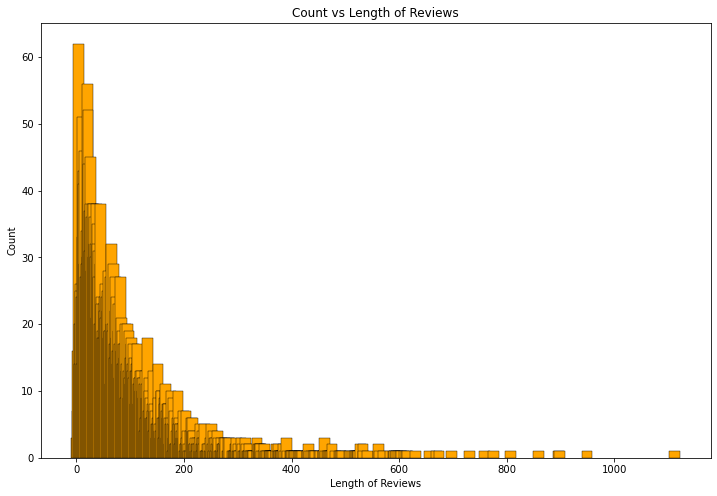

In [7]:
ulen=list(set(len_))

plt.figure(figsize=(12,8))
plt.bar(ulen, [len_.count(x) for x in ulen], width=20, color='orange', linewidth=0.4, edgecolor='black')
plt.xlabel('Length of Reviews')
plt.ylabel('Count')
plt.title('Count vs Length of Reviews')
plt.show()

In [8]:
df.describe(include = 'all')

,Reviews
count,3672
unique,3508
top,good
freq,22


# Most Frequent Words:

In [9]:
cnt = Counter()
for text in df["Reviews"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['Word', 'Count']
temp

,Word,Count
0,tv,1736
1,product,1059
2,good,942
3,stick,819
4,remote,779
5,fire,716
6,working,700
7,quality,641
8,amazon,620
9,smart,504


## `Adding Subjectivity & Polarity to reviews`

In [10]:
df['text_length']=df['Reviews'].str.split().map(lambda x: len(x))
df[['Reviews','text_length']]

def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity
 
df['Subjectivity'] = df.Reviews.apply(calc_subj)
df['Polarity'] = df.Reviews.apply(calc_pola)
1
2
df.head(4).style.background_gradient(cmap='plasma')

,Reviews,text_length,Subjectivity,Polarity
0,everything great bought days price hurts alot rs loss prime customer unhappy massive price drop,15,0.883333,0.066667
1,useing sony bx modal tv hdmi port fire tv stick supporting tv working properly getting display issues buy sony tvs,20,0.175000,0.125000
2,product works well upto year u need buy new one choice bought product rs offer year remote stopped working put new battery dry days want buy new remote new remote cost rs cheating brand like mi gives cheaper remote,39,0.357576,0.008754
3,customer support details available tvs compatible guess returnable well got bucks wasted bought watching many positive reviews feel sad,19,0.489091,0.085455


In [11]:
import nltk
nltk.download('vader_lexicon')
reviews = df["Reviews"]
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

sample = df['Reviews'][4]
print("Review:\n",sample)
print('_'*16)
print('SENTIMENT:',sentiment_value(sample))
print('_'*16)

Review:
 product description says made india package box says china misleading
________________
SENTIMENT: -0.4
________________


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## `Sentiment Analysis for all Reviews`

In [12]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Neutral'
    else:
        result = 'Negative'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)
1
df.head(6).style.background_gradient(cmap='icefire')

,Reviews,text_length,Subjectivity,Polarity,Sentiment
0,everything great bought days price hurts alot rs loss prime customer unhappy massive price drop,15,0.883333,0.066667,Positive
1,useing sony bx modal tv hdmi port fire tv stick supporting tv working properly getting display issues buy sony tvs,20,0.175000,0.125000,Positive
2,product works well upto year u need buy new one choice bought product rs offer year remote stopped working put new battery dry days want buy new remote new remote cost rs cheating brand like mi gives cheaper remote,39,0.357576,0.008754,Positive
3,customer support details available tvs compatible guess returnable well got bucks wasted bought watching many positive reviews feel sad,19,0.489091,0.085455,Positive
4,product description says made india package box says china misleading,10,0.000000,0.000000,Neutral
5,media could loaded system ui interface totally changedgrey iconmissing icon side loaded appssee tab missingupdate fix anythingi thought ive got defective product tried replacingbut amazon respondive used friends fire stick know firestick issues almost used month face problem hence proceeded buy one im disappointed got defective product softwaremore disappointing thing cant even replace wow,54,0.800000,-0.312500,Negative


# <span style='background :yellow' > Insights of Sentiment Analysis  </span>

Text(0.5, 1.0, 'Sentiment Analysis')

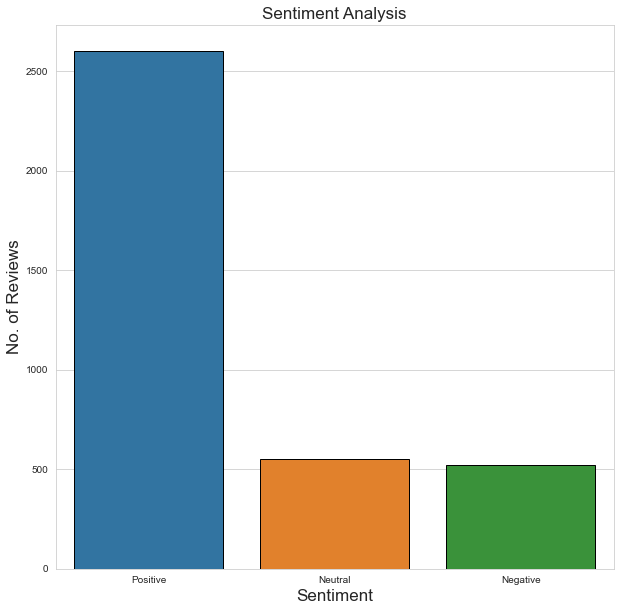

In [13]:
from textblob import TextBlob

reviews_ = list()
df_r=df['Reviews']
for row in df_r:
    blob = TextBlob(row)
    reviews_.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_r = pd.DataFrame(reviews_, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_r):
    if df_r['sentiment'] > 0:
        val = "Positive"
    elif df_r['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_r['Sentiment_Type'] = df_r.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_r,edgecolor="Black")
ax.set_xlabel(xlabel="Sentiment",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Sentiment Analysis',fontsize=17)

In [14]:
#  number of reviews per sentiment
sen_df = df['Sentiment'].value_counts().reset_index()
sen_df['% of reviews'] = sen_df['Sentiment'].map(lambda x : (x/sen_df['Sentiment'].sum())*100)
sen_df.style.background_gradient(cmap='summer_r')

,index,Sentiment,% of reviews
0,Positive,2600,70.806100
1,Neutral,552,15.032680
2,Negative,520,14.161220


## `Pie-Chart`

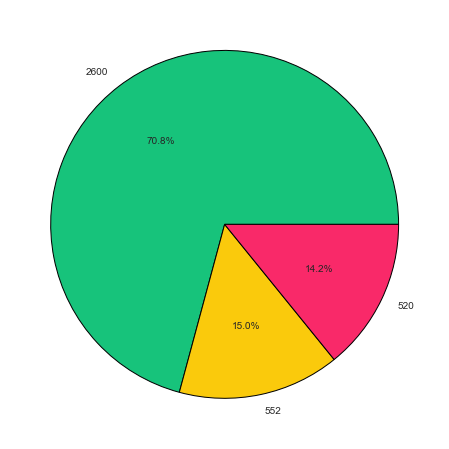

In [15]:
fig=plt.figure(figsize=(10,8))
percent_class=sen_df.Sentiment
labels= sen_df.Sentiment
colors = ['#17C37B','#FACA0C','#F92969']
my_pie,_,_ = plt.pie(percent_class,radius = 1,labels=labels,colors=colors,autopct="%.1f%%")
plt.setp(my_pie, width=1, edgecolor='k') 
plt.show()

## `Generate a Word-Cloud`

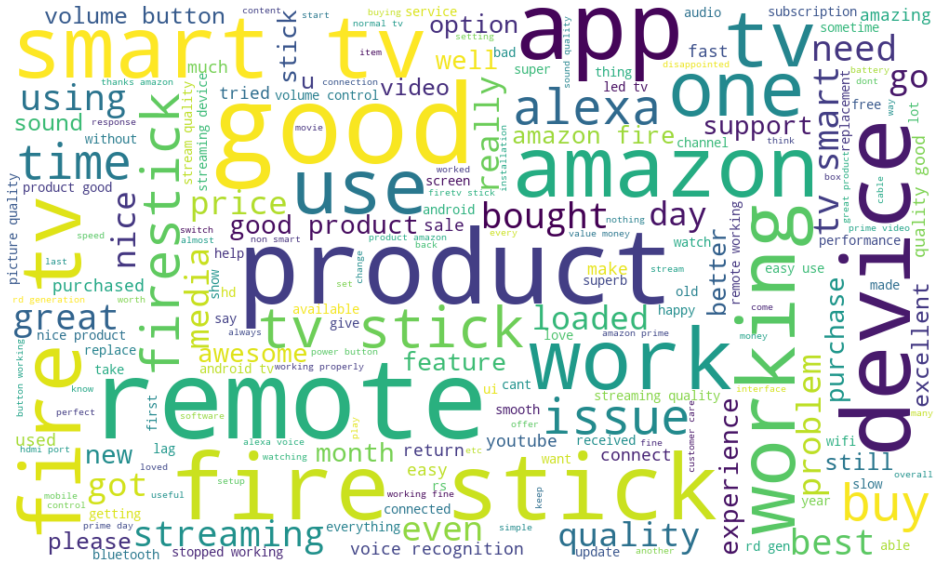

In [16]:
allwords = " ".join([review for review in df["Reviews"]])
wc = WordCloud(background_color ='white',width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=60)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

## `Word-Cloud for all Sentiment`

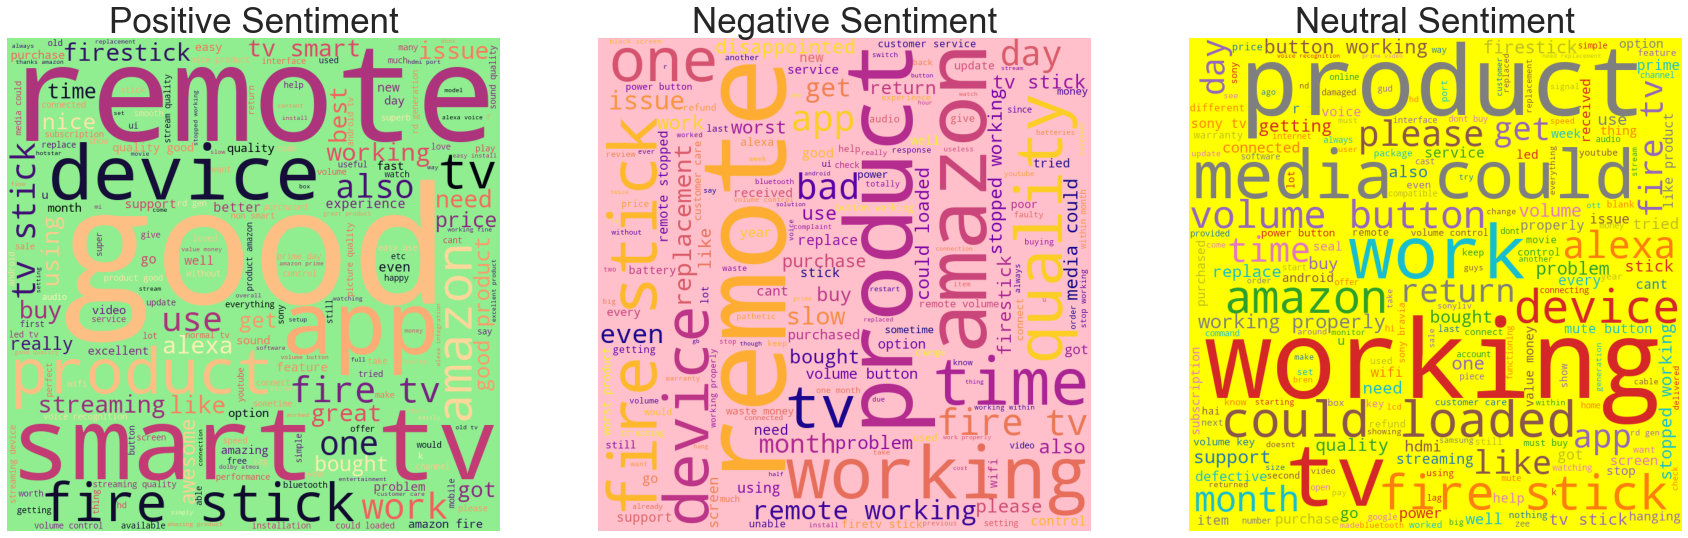

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = df[df["Sentiment"]=="Positive"]
df_neg = df[df["Sentiment"]=="Negative"]
df_neu = df[df["Sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='lightgreen',
                colormap="magma",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='pink',
                colormap="plasma",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.Reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='yellow',
                colormap="tab10",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral Sentiment',fontsize=35);

## `Using the n-gram tfidf vectorizer`
>## Term Frequency- Inverse Document Frequency

In [18]:
df["Sentiment"]=df["Sentiment"].apply(lambda x: 1 if x=="Positive" else 0)
df['Reviews'] = df['Reviews'].astype(str)
df

all_text=df['Reviews']
train_text=df['Reviews']
y=df['Sentiment']

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
train_features = hstack([train_char_features, train_word_features])

<AxesSubplot:xlabel='text_length', ylabel='count'>

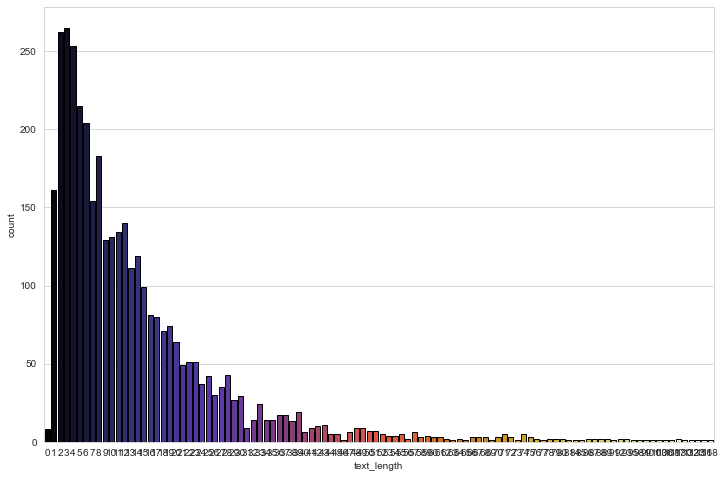

In [19]:
fig=plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x="text_length",data=df, palette="CMRmap",edgecolor="Black")

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

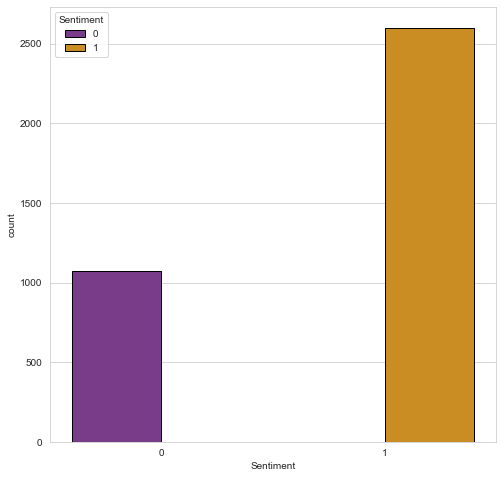

In [20]:
fig=plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.countplot(x="Sentiment",hue="Sentiment",data=df, palette="CMRmap",edgecolor="Black")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101,shuffle = True)
print(f"\n Input training data :{X_train.shape} \n Input test data :{X_test.shape}\n Output training data :{y_train.shape}\n Output test data : {y_test.shape}")


 Input training data :(2570, 55964) 
 Input test data :(1102, 55964)
 Output training data :(2570,)
 Output test data : (1102,)


## `KFold CrossValidation`

In [22]:
# Using KFold CrossValidation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X_test, y_test, cv=kfold)
print("-"*42)
print("Accuracy:",results.mean()*100,"%")
print("-"*18)

------------------------------------------
Accuracy: 83.03439803439802 %
------------------


## 1) `Naive Bayes Model`

In [23]:
# Naive Bayes Classiication 
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
NB_acc = accuracy_score(y_pred,y_test)
results = cross_val_score(NB, X_test, y_test,cv=kfold)

print('Training Accuracy:', NB.score(X_train,y_train)*100)
print('Test Accuracy:', NB.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)

Training Accuracy: 81.43968871595331
Test Accuracy: 77.22323049001815
KFold Accuracy: 72.41441441441442


## `2) Random Forest Model`

In [24]:
# RFC (Random Forest Classifier)
rfc = RandomForestClassifier(n_jobs=4,oob_score=True,criterion='entropy',n_estimators=150)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rf_acc=accuracy_score(y_pred,y_test)
results = cross_val_score(rfc, X_test, y_test, cv=kfold)
print('Training accuracy:', rfc.score(X_train,y_train)*100)
print('Test accuracy:', rfc.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)

Training accuracy: 100.0
Test accuracy: 87.11433756805808
KFold Accuracy: 82.4914004914005


## `3) XG Boost Model`

In [25]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(xgb, X_test, y_test,cv=kfold)

print('Training Accuracy:', xgb.score(X_train,y_train)*100)
print('Test Accuracy:', xgb.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)

Training Accuracy: 99.88326848249028
Test Accuracy: 90.19963702359347
KFold Accuracy: 85.03194103194105


## `4) RidgeClassifier Model`

In [26]:
Ridg = RidgeClassifier()
Ridg.fit(X_train,y_train)
y_pred = Ridg.predict(X_test)
Ridg_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(Ridg, X_test, y_test,cv=kfold)

print('Training Accuracy:', Ridg.score(X_train,y_train)*100)
print('Test Accuracy:', Ridg.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)

Training Accuracy: 100.0
Test Accuracy: 90.10889292196008
KFold Accuracy: 87.38984438984438


## `5) logistic regression model`

In [27]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
# make class predictions for X_test_dtm
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
log_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(logreg, X_test, y_test,cv=kfold)

print('Training Accuracy:', logreg.score(X_train,y_train)*100)
print('Test Accuracy:', logreg.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)

Training Accuracy: 97.15953307392996
Test Accuracy: 89.01996370235935
KFold Accuracy: 83.03439803439802


## `6) Gradient Boosting Classifier`

In [28]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
results = cross_val_score(gbc, X_test, y_test,cv=kfold)

print('Training Accuracy:', gbc.score(X_train,y_train)*100)
print('Test Accuracy:', gbc.score(X_test,y_test)*100)
print('KFold Accuracy:',results.mean()*100)

Training Accuracy: 93.65758754863813
Test Accuracy: 87.11433756805808
KFold Accuracy: 81.3071253071253


## `7) Neural Network`

In [29]:
X = df["Reviews"]
y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  146,    3,   66,
         20,    5,  268,   67,  189,  113, 1482,  447,   15,  161,  296,
        162,   30,   86, 1483,   54, 1206,   93,   97,    5])

- `Bidirectional LSTM`

In [31]:
# construct model
BATCH_SIZE = 32

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          326016    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 470,945
Trainable params: 470,945
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/do

In [32]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
87/87 [==============================] - 18s 135ms/step - loss: 0.5145 - accuracy: 0.7505 - val_loss: 0.3654 - val_accuracy: 0.8355
Epoch 2/15
87/87 [==============================] - 10s 111ms/step - loss: 0.1867 - accuracy: 0.9277 - val_loss: 0.2870 - val_accuracy: 0.8922
Epoch 3/15
87/87 [==============================] - 10s 111ms/step - loss: 0.0612 - accuracy: 0.9829 - val_loss: 0.2827 - val_accuracy: 0.9107
Epoch 4/15
87/87 [==============================] - 10s 110ms/step - loss: 0.0210 - accuracy: 0.9924 - val_loss: 0.3572 - val_accuracy: 0.9183
Epoch 5/15
87/87 [==============================] - 10s 115ms/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.5445 - val_accuracy: 0.9107
Epoch 6/15
87/87 [==============================] - 10s 115ms/step - loss: 0.0195 - accuracy: 0.9949 - val_loss: 0.4492 - val_accuracy: 0.9139
Epoch 7/15
87/87 [==============================] - 10s 117ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.4409 - val_accuracy: 0.9096

In [33]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
Dx= (roc_auc_score(y_test,pred_test)*100)
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)*100))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_train, pred_train)*100))

29/29 [==============================] - 1s 32ms/step
LSTM Recurrent Neural Network: 95.6146990529958
LSTM Recurrent Neural Network: 100.0


In [34]:
model.evaluate(X_test_seq_padded, y_test)

29/29 [==============================] - 1s 32ms/step - loss: 0.5200 - accuracy: 0.9107


[0.5199978351593018, 0.9106754064559937]

Text(0.5, 1.0, 'Training and Validation Accuracy')

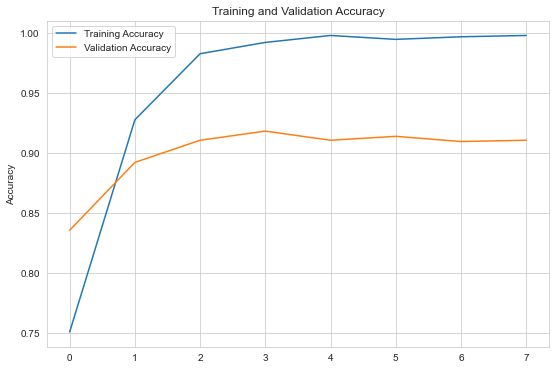

In [35]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

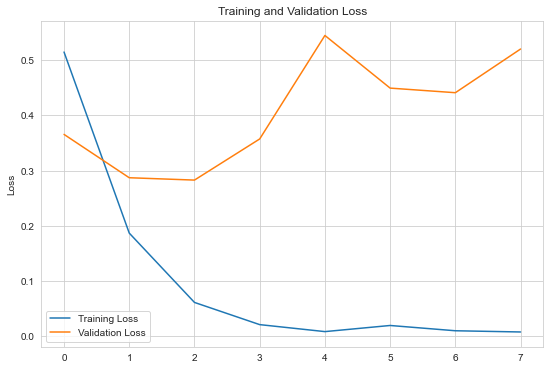

In [36]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

In [38]:
# initialize list of lists
data = [['Random Forest Classifier', rf_acc], ['XGboost Classifier', xgb_acc],['Naive Bayes Classiication',NB_acc],['ridge Classifier',Ridg_acc],['logistic regression',log_acc],['Gradient Boosting Classifier',gbc_acc],['Neural Network',Dx]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Model','Test Accuracy'])

# print dataframe.
df

,Model,Test Accuracy
0,Random Forest Classifier,0.871143
1,XGboost Classifier,0.901996
2,Naive Bayes Classiication,0.772232
3,ridge Classifier,0.901089
4,logistic regression,0.890200
5,Gradient Boosting Classifier,0.871143
6,Neural Network,95.614699


### [<a href="#."> Back To Top</a>] 
# End